## Regression

So far we have focused on classification.

We were trying to learn a function $f:\mathcal{X} \rightarrow \mathcal{Y}$ where $\mathcal{Y}$ was discrete.

Usually we had $\mathcal{Y} = \{-1,1\}$.

In **regression** we try to learn a function $f:\mathcal{X} \rightarrow \mathcal{Y}$ where $\mathcal{Y}$ is continuous.  

---

Just as there are many algorithms for classiciation, there are also many algorithms for regression.

Most popular ML algorithms have both classification and regression versions. 

---

### Linear Regression

The study of regression usually starts with linear regression.

We have an unknown function $f:\mathcal{X} \rightarrow \mathbb{R}$.

Typically $\mathcal{X} = \mathbb{R}^d$ for some $d \in \mathbb{N}$.

We get to see some "examples" of $f$: $\{({\bf x}^{(1)},y^{(1)}),({\bf x}^{(2)},y^{(2)}),\ldots,({\bf x}^{(N)},y^{(N)})\}$

We then find some ${\bf w} \in \mathbb{R}^{d+1}$ such that ${\bf w}^T{\bf x} \approx f({\bf x})$.

(we assume ${\bf x}$ begins with a bias 1)

This is done by finding the ${\bf w}$ that minimizes some error function $J({\bf w})$. 

Usually we used the mean squared error:

$$J({\bf w}) = \frac{1}{2N} \sum_{i=1}^N (y^{(i)}-{\bf w}^T{\bf x}^{(i)})$$

![img](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/residuals-300x186.png?resize=300%2C186)

### Adaline?  Is that you?

When $J({\bf w})$ is minimized by gradient descent we call the algorithm Adaline.

We have already discussed it!

The only difference is that at prediction time you do not threshold.

$$\hat{y} = X{\bf w}$$

whereas for classification we were doing


$$\hat{y} = \phi(X{\bf w})$$


---

### Another approach to linear regression

For the simple mean squared error function it is also possible to simply solve $\nabla_{\bf w} J({\bf w}) = {\bf 0}$ for ${\bf w}$.

(Let's do it)

The derivation is simplified using two formulas.

1) $\nabla_{\bf w} {\bf w^T}{\bf b} = {\bf b}$
2) $\nabla_{\bf w} {\bf w^T}A{\bf w} = 2A{\bf w}$  (when $A$ symmetric)

These are the "matrix versions" of

1) $\frac{d}{dx} bx = b$
2) $\frac{d}{dx} ax^2 = 2ax$

We begin by rewriting

$$J({\bf w}) = \frac{1}{2N}(y-X{\bf w})^T(y-X{\bf w})$$

After FOIL, collecting like terms, and using the formulas, we get

$$\nabla_{\bf w} J({\bf w}) = -Xy + X^TX{\bf w} = {\bf 0}$$

Then

${\bf w} = (X^TX)^{-1}X^Ty$

The funny expression $(X^TX)^{-1}X^T$ actually has a name: [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)

Often we denote it $X^{\dagger} = (X^TX)^{-1}X^T$.

Note that $X^{\dagger}X = I$, even if $X$ is not square!

There is a hidden assumption that $X^TX$ is invertible.

It is not logically necessary that $X^TX$ is invertible, but in practice it almost always is.

In `numpy` it is `np.linalg.pinv(X)`.

---

### Scaling

Scaling the data is important for regression just as it was for classification.

Adaline usually needs scaled data to converge.

Unscaled data may even cause numerical problems for the closed form solution.



In [10]:
import numpy as np

X = np.random.randn(5,3)
y = np.random.choice([-1,1],size=5,replace=True)
X,y

(array([[ 0.44773767,  0.36590024,  0.24678207],
        [-1.04114685, -0.03338108, -0.67883134],
        [-0.09778322,  0.31869046,  0.41456231],
        [-0.62962622, -2.01062291,  0.01686539],
        [-0.15639842,  0.02121024, -1.26702907]]),
 array([ 1,  1, -1, -1, -1]))

In [11]:
inv = np.linalg.inv 
(inv(X.T@X)@X.T)@y

array([-0.5717831 ,  0.64348832,  0.36373679])

In [12]:
np.linalg.pinv(X)@y

array([-0.5717831 ,  0.64348832,  0.36373679])

In [13]:
X.T@X

array([[1.71490698, 1.43004299, 0.96426196],
       [1.43004299, 4.27961523, 0.18429086],
       [0.96426196, 0.18429086, 2.2992224 ]])

In [14]:
inv(X.T@X)

array([[ 1.13451668, -0.35985421, -0.44695695],
       [-0.35985421,  0.34861634,  0.12297502],
       [-0.44695695,  0.12297502,  0.61252031]])

### Error metrics

For classification we had nice "portable" notions of performance:

accuracy, precision, recall, f1-score, roc-auc

These measures are all in the interval $[0,1]$ and we can tell how "good" a model is just by how close the measures are to 1. 

In regression we *can* use MSE as an error metric.

However it will not really be comparable between problems.

Visualizing the residuals is a nice way to estimate error:

![residuals](residuals.png)

#### Mean absolute error


Another common measure of performance in regression is mean absolute error (MAE).

The "mean absolute error" metric has a similar problem to MSE: 

distances are bigger in higher dimensions and the measure is not really portable.

### A "normalized" MSE

Consider the expression 

$$\frac{\sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^N (y^{(i)} - \mu)^2}$$

where

1) $\hat{y}^{(i)} = {\bf w^T}{\bf x}^{(i)}$
2) ${\bf w}$ minimizes $J({\bf w})$ (MSE)
3) $\mu = \frac{1}{N} \sum_{i=1}^N{y}^{(i)}$

Because $y=\mu$ is itself a line and ${\bf w}$ minimizes $J({\bf w})$ over all lines, this fraction is in the range $[0,1]$.

Near 0 $\rightarrow$ "predictions are great"

Near 1 $\rightarrow$ "predictions are awful"


It would be more intuitive if 1 $\approx$ "good" and 0 $\approx$ "bad", as is the case with accuracy, f1-score, etc. 

This gives us $R^2$, the **coefficient of determination**:

$$R^2 = 1-\frac{\sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^N (y^{(i)} - \mu)^2}.$$

$R^2 \approx 1 \rightarrow$ "predictions are great"

$R^2 \approx 0 \rightarrow$ "predictions are awful"

It is actually possible for $R^2$ to be **negative** on the training set, if the predictions are even worse than just predicting the mean $y$ value.

This means that the model is doing worse than you could do without even seeing $X$.



### Exercise

Below is some minimally functional code for doing 1d linear regression.

Can you find the $R^2$ score?

What happens if we add a big outlier?

[-0.48518726 -0.26458221]


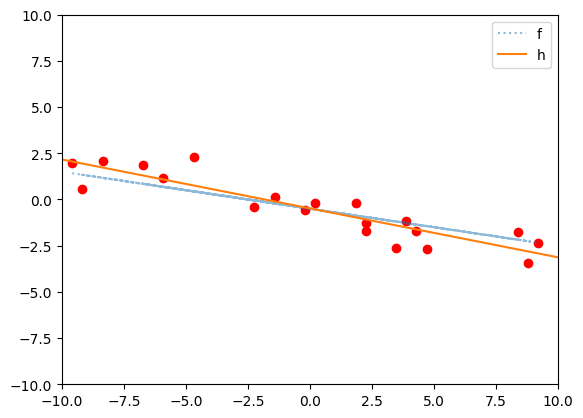

In [20]:
###
import matplotlib.pyplot as plt
import numpy as np


def plot_w(w,label=""):
    x = np.linspace(-10,10)
    b,m = w
    plt.plot(x,m*x +b,label=label)
    plt.ylim(-10,10)
    
def make_blob(w,sigma):
    xpts = np.random.choice(np.linspace(-10,10),20)
    b,m = w
    ypts = m*xpts + b

    plt.plot(xpts,ypts,":",alpha=0.5,label="f")
    noise = np.random.randn(len(ypts))
    ypts = ypts + noise
    plt.scatter(xpts,ypts,c='r')
    X = np.ones(2*len(ypts)).reshape(len(ypts),2)
    X[:,1] = xpts
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    return X,ypts

w = np.array([-.5,-0.2])

#plot_w(w)
X,y=make_blob(w,5)    

w_lin = np.linalg.pinv(X)@y
print(w_lin)
plot_w(w_lin,"h")
plt.legend()
plt.show()

### Regularization

We can add regularization to a regression model just as we did with a classification model.

#### Ridge regression

This is just a another term for the L2 penalty. 

![img](ridge.png)


#### Lasso regression

This is another term for the L1 penalty.

![img](lasso.png)

![img](L1_vs_L2.png)

### Implementing regularization

Turning on either L1 or L2 penalties in Adaline will yield Ridge and Lasso, respectively.

There is also an analytical solution to ridge regression:

$${\bf w}=\left [ \frac{1}{N}X^TX + \lambda I \right ]^{-1}\frac{1}{N}X^Ty $$

You can set `I[0][0]=0` to avoid regularizing the intercept term.

You can find a derivation here: https://web.mit.edu/zoya/www/linearRegression.pdf


### Outliers

Just as in classification, outliers can cause problems with performance.

The toy situation below lets us experiment with a serious outlier. 


[-3.19017149 -0.87493677]


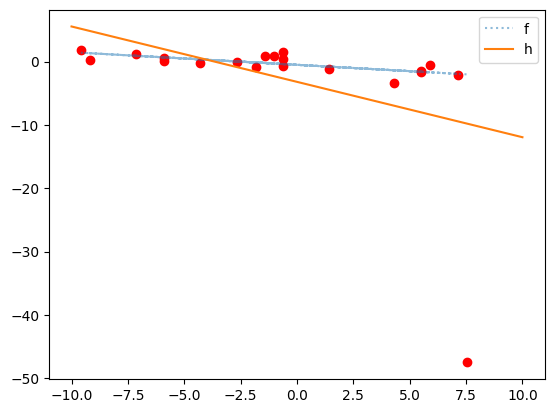

0.19363178665256442

In [34]:
###
import matplotlib.pyplot as plt
import numpy as np


def plot_w(w,label=""):
    x = np.linspace(-10,10)
    b,m = w
    plt.plot(x,m*x +b,label=label)
    #plt.ylim(-10,10)
    
def make_blob(w,sigma):
    np.random.seed(42)
    xpts = np.random.choice(np.linspace(-10,10),20)
    b,m = w
    ypts = m*xpts + b

    plt.plot(xpts,ypts,":",alpha=0.5,label="f")
    noise = np.random.randn(len(ypts))
    ypts = ypts + noise
    ypts[-1] *= 15
    plt.scatter(xpts,ypts,c='r')
    X = np.ones(2*len(ypts)).reshape(len(ypts),2)
    X[:,1] = xpts
    #plt.ylim(-10,10)
    #plt.xlim(-10,10)
    return X,ypts

w = np.array([-.5,-0.2])
R2 = lambda X,y,w : 1-((y-X@w)**2).sum()/((y-np.mean(y))**2).sum()
#plot_w(w)
X,y=make_blob(w,5)    

w_lin = np.linalg.pinv(X)@y
print(w_lin)
plot_w(w_lin,"h")
plt.legend()
plt.show()
R2(X,y,w_lin)


![ransac](RANSAC.png)